In [1]:
import sqlite3
import pandas as pd

# Lyrics

In [2]:
connection = sqlite3.connect("../data/raw/mxm_dataset.db")

query = """
    SELECT *
    FROM lyrics
"""

lyrics = pd.read_sql(query, connection)
      
connection.close()

lyrics

,track_id,mxm_tid,word,count,is_test
0,TRAAAAV128F421A322,4623710,i,6,0
1,TRAAAAV128F421A322,4623710,the,4,0
2,TRAAAAV128F421A322,4623710,you,2,0
3,TRAAAAV128F421A322,4623710,to,2,0
4,TRAAAAV128F421A322,4623710,and,5,0
...,...,...,...,...,...
19045327,TRZZZZD128F4236844,2466899,easili,1,1
19045328,TRZZZZD128F4236844,2466899,disast,1,1
19045329,TRZZZZD128F4236844,2466899,frown,1,1
19045330,TRZZZZD128F4236844,2466899,teas,1,1


In [3]:
lyrics = (
    lyrics
    .pivot(columns="word", index="track_id", values="count")
    .fillna(0).astype(int)
)

lyrics 

word,&,000,1,10,100,12,13,15,16,2,...,è,é,él,és,était,être,ô,über,–,‘caus
track_id,,,,,,,,,,,,,,,,,,,,,
TRAAAAV128F421A322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAABD128F429CF47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAED128E0783FAB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAEF128F4273421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAEW128F42930C0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRZZZXA128F428ED56,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRZZZXV128F4289747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRZZZYV128F92E996D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Metadata

In [4]:
connection = sqlite3.connect("../data/raw/track_metadata.db")

query = """
    SELECT *
    FROM songs
"""

songs = pd.read_sql(query, connection)

connection.close()

songs

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,TRYYYUS12903CD2DF0,O Samba Da Vida,SOTXAME12AB018F136,Pacha V.I.P.,AR7Z4J81187FB3FC59,9d50cb20-7e42-45cc-b0dd-154c3e92a577,Kiko Navarro,217.44281,0.528617,0.411595,0
999996,TRYYYJO128F426DA37,Jago Chhadeo,SOXQYIQ12A8C137FBB,Naale Baba Lassi Pee Gya,ART5FZD1187B9A7FCF,2357c400-9109-42b6-b3fe-9e2d9f8e3872,Kuldeep Manak,244.16608,0.401500,0.374866,0
999997,TRYYYMG128F4260ECA,Novemba,SOHODZI12A8C137BB3,Dub_Connected: electronic music,ARZ3R6M1187B9AF750,8b97e9c8-61f5-4615-9a96-276f24204e34,Gabriel Le Mar,553.03791,0.556918,0.336914,0
999998,TRYYYDJ128F9310A21,Faraday,SOLXGOR12A81C21EB7,The Trance Collection Vol. 2,ARCMCOK1187B9B1073,4ac5f3de-c5ad-475e-ad50-41f1ef9dba20,Elude,484.51873,0.403668,0.256935,0


In [5]:
songs = songs.drop(
    columns=[
        "song_id",
        "release",
        "artist_id",
        "artist_mbid",
        "artist_familiarity",
        "artist_hotttnesss",
    ]
)
songs

,track_id,title,artist_name,duration,year
0,TRMMMYQ128F932D901,Silent Night,Faster Pussy cat,252.05506,2003
1,TRMMMKD128F425225D,Tanssi vaan,Karkkiautomaatti,156.55138,1995
2,TRMMMRX128F93187D9,No One Could Ever,Hudson Mohawke,138.97098,2006
3,TRMMMCH128F425532C,Si Vos Querés,Yerba Brava,145.05751,2003
4,TRMMMWA128F426B589,Tangle Of Aspens,Der Mystic,514.29832,0
...,...,...,...,...,...
999995,TRYYYUS12903CD2DF0,O Samba Da Vida,Kiko Navarro,217.44281,0
999996,TRYYYJO128F426DA37,Jago Chhadeo,Kuldeep Manak,244.16608,0
999997,TRYYYMG128F4260ECA,Novemba,Gabriel Le Mar,553.03791,0
999998,TRYYYDJ128F9310A21,Faraday,Elude,484.51873,0


# Genres

In [6]:
genres = pd.read_csv(
    "../data/raw/msd-topMAGD-genreAssignment.cls",
    sep="\t",
    header=None,
    names=["track_id", "genre"],
)
genres

,track_id,genre
0,TRAAAAK128F9318786,Pop_Rock
1,TRAAAAV128F421A322,Pop_Rock
2,TRAAAAW128F429D538,Rap
3,TRAAABD128F429CF47,Pop_Rock
4,TRAAACV128F423E09E,Pop_Rock
...,...,...
406422,TRZZZYV128F92E996D,RnB
406423,TRZZZYX128F92D32C6,Pop_Rock
406424,TRZZZZK128F4227B6F,Pop_Rock
406425,TRZZZZL128F92F9D4A,Electronic


# Merging

In [7]:
df = (
    genres
    .merge(right=songs, on="track_id", how="inner")
    .merge(right=lyrics, on="track_id", how="inner")
)

df

,track_id,genre,title,artist_name,duration,year_x,&,000,1,10,...,è,é,él,és,était,être,ô,über,–,‘caus
0,TRAAAAV128F421A322,Pop_Rock,A Poor Recipe For Civic Cohesion,Western Addiction,118.07302,2005,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops,148.03546,1969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TRAAAED128E0783FAB,Vocal,It's About Time,Jamie Cullum,246.98730,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,Pop_Rock,Something Girls,Adam Ant,233.40363,1982,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob,209.60608,2007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127397,TRZZZQO128E078864C,Pop_Rock,Weight Of The World (LP Version),Overkill,247.17016,1993,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127398,TRZZZWS128F429CF87,Latin,Que No Destrocen Tu Vida,Los Prisioneros,256.31302,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127399,TRZZZXA128F428ED56,Pop_Rock,No Angels,The God Awfuls,123.06240,2004,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
127400,TRZZZYV128F92E996D,RnB,Dear Lie,TLC,310.72608,1999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127402 entries, 0 to 127401
Columns: 5006 entries, track_id to ‘caus
dtypes: float64(1), int64(5001), object(4)
memory usage: 4.8+ GB


In [9]:
df.describe(include=object)

,track_id,genre,title,artist_name
count,127402,127402,127402,127402
unique,127402,13,107894,11851
top,TRAAAAV128F421A322,Pop_Rock,Intro,Carly Simon
freq,1,95752,104,103


In [10]:
df.describe(include="number")

,duration,year_x,&,000,1,10,100,12,13,15,...,è,é,él,és,était,être,ô,über,–,‘caus
count,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,...,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000
mean,238.714188,1622.429742,0.031868,0.002292,0.028163,0.008383,0.002496,0.004443,0.001962,0.002708,...,0.027865,0.022347,0.002943,0.001327,0.001868,0.003085,0.001601,0.004231,0.008336,0.002331
std,91.388476,781.789940,0.458586,0.078413,0.451986,0.156267,0.087041,0.113717,0.070850,0.085258,...,0.451049,0.417750,0.110582,0.081911,0.068601,0.098169,0.151643,0.103650,0.302826,0.080144
min,0.522000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.118730,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,229.015060,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,272.744040,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3024.665670,2010.000000,46.000000,12.000000,107.000000,16.000000,17.000000,13.000000,13.000000,13.000000,...,27.000000,41.000000,15.000000,16.000000,10.000000,16.000000,40.000000,12.000000,39.000000,8.000000


In [11]:
df.genre.value_counts()/df.genre.count()*100

genre
Pop_Rock         75.157376
Latin             4.346086
Rap               4.152996
Country           3.974820
RnB               3.680476
Electronic        2.844539
International     1.691496
Vocal             1.175021
Folk              1.054928
Reggae            0.727618
Jazz              0.551797
Blues             0.499207
New Age           0.143640
Name: count, dtype: float64

## Drop Columns which are less than 1% of the data

In [ ]:
# Drop less than 1% as well as International due to multiple languages being present
genres_to_drop = ["International", "Reggae", "Jazz", "Blues", "New Age"]
df = df[~df["genre"].isin(genres_to_drop)]
df

,track_id,genre,title,artist_name,duration,year_x,&,000,1,10,...,è,é,él,és,était,être,ô,über,–,‘caus
0,TRAAAAV128F421A322,Pop_Rock,A Poor Recipe For Civic Cohesion,Western Addiction,118.07302,2005,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops,148.03546,1969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,Pop_Rock,Something Girls,Adam Ant,233.40363,1982,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob,209.60608,2007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,TRAAAHJ128F931194C,Pop_Rock,The Last Beat Of My Heart (b-side),Devotchka,337.81506,2004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127397,TRZZZQO128E078864C,Pop_Rock,Weight Of The World (LP Version),Overkill,247.17016,1993,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127398,TRZZZWS128F429CF87,Latin,Que No Destrocen Tu Vida,Los Prisioneros,256.31302,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127399,TRZZZXA128F428ED56,Pop_Rock,No Angels,The God Awfuls,123.06240,2004,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
127400,TRZZZYV128F92E996D,RnB,Dear Lie,TLC,310.72608,1999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.genre.value_counts()

genre
Pop_Rock      95752
Latin          5537
Rap            5291
Country        5064
RnB            4689
Electronic     3624
Reggae          927
Name: count, dtype: int64

In [37]:
df = pd.read_csv(
    "../data/raw/msd-MASD-styleAssignment.cls",
    sep="\t",
    header=None,
    names=["track_id", "style"],
)


In [36]:
styles.set_index("track_id")

,style
track_id,
TRAAAAK128F9318786,Metal_Alternative
TRAAAAV128F421A322,Punk
TRAAAAW128F429D538,Hip_Hop_Rap
TRAAACV128F423E09E,Rock_Neo_Psychedelia
TRAAAEF128F4273421,Pop_Indie
...,...
TRZZZYS128F92E3FD1,Electronica
TRZZZYV128F92E996D,Pop_Contemporary
TRZZZYX128F92D32C6,Rock_Contemporary


In [41]:
dict_columns = df.to_dict(orient='dict') # {column -> {index -> value}}
dict_list = df.to_dict(orient='list') # {column -> [value1, value2, ...]}
dict_records = df.to_dict(orient='records') # [{column -> value}, ..., {column -> value}]
dict_index = df.to_dict(orient='index') # {index -> {column -> value}}
dict_series = df.to_dict(orient='series') # {column -> Series(values)}
dict_split = df.to_dict(orient='split') # {'index' -> [index], 'columns' -> [columns], 'data' -> [values]}
dict_tight = df.to_dict(orient='tight') # {'index' -> [index], 'columns' -> [columns], 'data' -> [values], 'index_names' -> [index.names], 'column_names' -> [column.names]}

print("Dictionary by columns:", dict_columns[10])
print("Dictionary by list:", dict_list[10])
print("Dictionary by records:", dict_records[10])
print("Dictionary by index:", dict_index[10])
print("Dictionary by series:", dict_series[10])
print("Dictionary by split:", dict_split[10])
print("Dictionary by tight:", dict_tight[10])

KeyError: 10

In [ ]:
df["year_x"].value_counts()

year_x
0       24005
2007     8206
2006     7808
2005     7366
2008     6671
        ...  
1932        1
1944        1
1934        1
1949        1
1929        1
Name: count, Length: 76, dtype: int64

<Axes: >

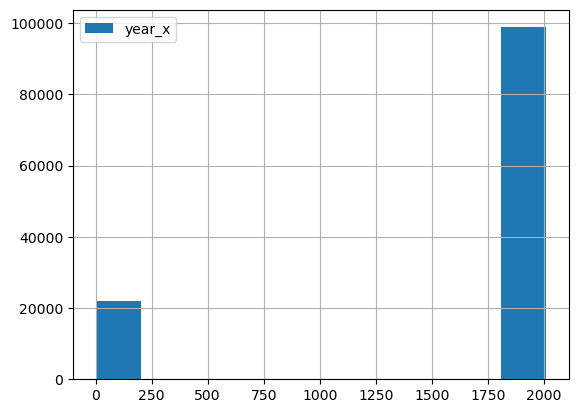

In [32]:
df["year_x"].hist(legend=True)

In [33]:
df["year_x"].value_counts()/df["year_x"].count()*100

year_x
0       18.261308
2007     6.551736
2006     6.200986
2005     5.872572
2008     5.336521
          ...    
1945     0.000827
1944     0.000827
1951     0.000827
1936     0.000827
1950     0.000827
Name: count, Length: 64, dtype: float64

In [ ]:
# df.to_parquet("../data/processed/merged_data.parquet")

what are the most commmn words per genre
what 

plt.savefig

what re the